# Pymaceuticals Inc.
---

## Key Observations and Insights from the Pymaceutical Anticancer Study Data Analysis

### 1.	Effectiveness of Capomulin and Ramicane:
Capomulin and Ramicane stand out as potentially more effective treatments, with significantly lower mean and median tumor volumes compared to other regimens. Ramicane shows higher consistency, indicated by lower standard deviation and standard error, suggesting a more tightly clustered distribution of tumor volumes.
### 2.	Treatment Variability:
Ketapril and Naftisol exhibit higher variability in tumor volume, reflected in higher variance, standard deviation, and standard error. This variability may imply a less predictable treatment outcome.
### 3.	Gender Distribution:
The dataset has a slightly imbalanced gender distribution, with 51.0% male mice and 49.0% female mice. While the difference is minor, it's essential to consider potential gender-related effects on treatment outcomes.
### 4.	Boxplots:
Capomulin and Ramicane showcase consistent and narrow distributions without potential outliers, indicating a more predictable response. Infubinol has one potential outlier at Timepoint 31, suggesting an extreme response in one mouse. Ceftamin, like Capomulin and Ramicane, does not exhibit potential outliers.
### 5.	Line Plot (Mouse I509 under Capomulin Regimen):
Mouse I509 treated with Capomulin shows a significant decline in tumor volume from Timepoint 20 to 40, indicating a positive response to the treatment during this period.
### 6.	Scatter Plot (Mouse Weight vs. Average Tumor Volume):
The scatter plot suggests a positive correlation between mouse weight and average tumor volume for mice under the Capomulin regimen. As mouse weight increases, there is a tendency for the average tumor volume to increase.
### 7.	Correlation and Regression:
The strong positive correlation coefficient of 0.84 and the regression model indicate a robust linear relationship between mouse weight and average tumor volume. The slope (0.95) suggests that, on average, for every unit increase in mouse weight, the tumor volume increases by 0.95 units. The strong correlation and positive slope of the regression line indicate that weight is likely a significant factor influencing tumor volume in this specific treatment scenario.

### These findings provide valuable insights into the effectiveness and variability of different treatment regimens, gender distribution, and specific responses to treatments over time. Further investigation and experimentation may be warranted to deepen our understanding of these trends and their implications for potential therapeutic strategies.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_series = duplicate_mice['Mouse ID'].unique()
duplicate_mice_series

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data.duplicated(['Mouse ID'], keep=False) & (combined_data['Mouse ID'] == 'g989')]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame(summary_statistics)

# Display the summary statistics DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = (
    combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
    .agg(
        mean='mean',
        median='median',
        var='var',
        std='std',
        sem=st.sem
    )
)

# Create a new MultiIndex with 'Tumor Volume (mm3)' above for 'var', 'std', and 'sem'
summary_df.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_df.columns])

# Apply styling only to specific columns (e.g., aligning values to the right for mean, median, var, std)
styled_summary_df = summary_df.style.set_properties(subset=[('Tumor Volume (mm3)', 'mean'),
                                                           ('Tumor Volume (mm3)', 'median'),
                                                           ('Tumor Volume (mm3)', 'var'),
                                                           ('Tumor Volume (mm3)', 'std')],
                                                    **{'text-align': 'right'})

# Display the styled DataFrame
styled_summary_df

## Bar and Pie Charts

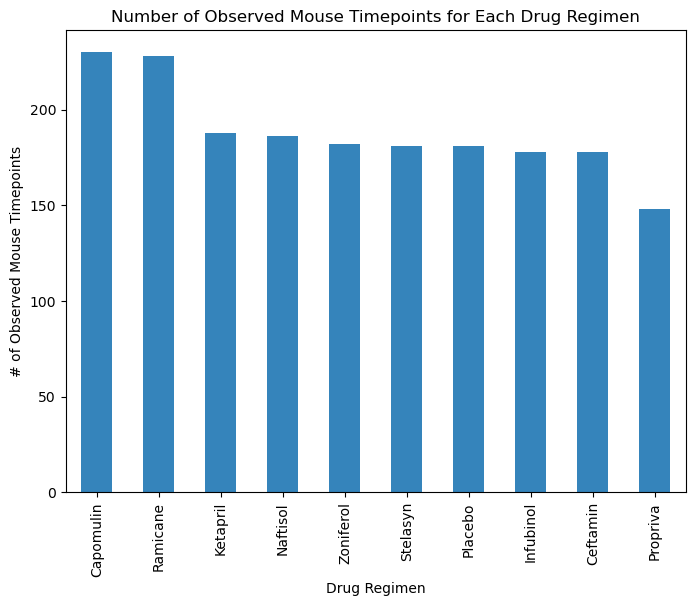

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Calculate the total number of rows for each drug regimen
row_counts = cleaned_data['Drug Regimen'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
row_counts.plot(kind='bar', color='#1f77b4', alpha=0.9)

# Set the title and labels
plt.title('Number of Observed Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

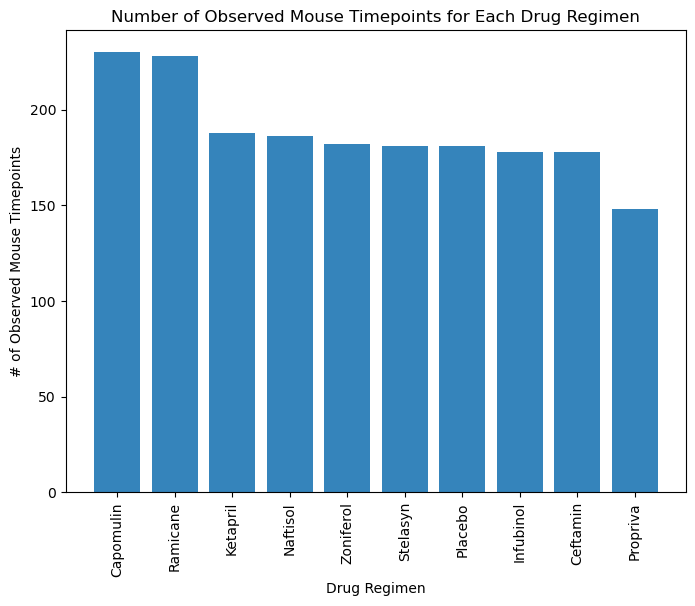

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the total number of rows for each drug regimen
row_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(8, 6))
plt.bar(row_counts.index, row_counts, color='#1f77b4', alpha=0.9)

# Set the title and labels
plt.title('Number of Observed Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90, ha='center')
plt.show()


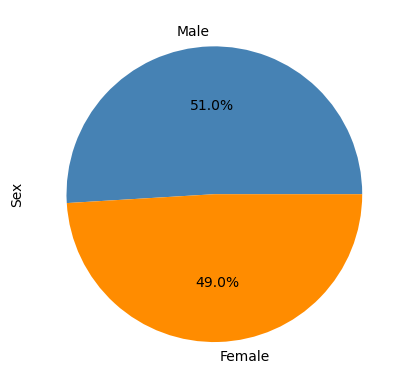

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the distribution of female and male mice
sex_distribution = cleaned_data['Sex'].value_counts()

# Create a pie plot using Pandas plotting
sex_distribution.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%', colors=['steelblue', 'darkorange'])
plt.show()

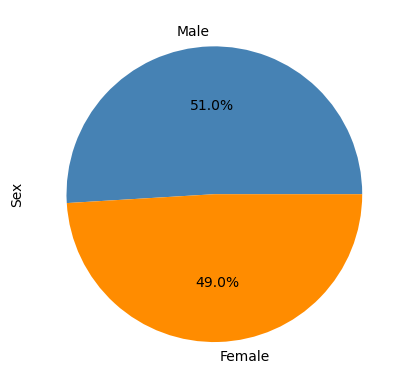

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie char
labels = ["Male", "Female"]

sex_distribution = cleaned_data['Sex'].value_counts()

# Plotting the pie chart

plt.pie(sex_distribution, labels=labels, autopct='%1.1f%%', colors=['steelblue', 'darkorange'])
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Convert the result to a DataFrame
last_timepoints_df = pd.DataFrame(last_timepoints).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

In [25]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments_list:
    # Locate the rows for the current treatment and get the tumor volumes
    subset_tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Append the subset tumor volumes to tumor_vol_data
    tumor_vol_data.append(subset_tumor_volumes.values)

    # Calculate the quartiles and IQR for each treatment
    quartiles = subset_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    # Identify potential outliers
    outliers = subset_tumor_volumes[(subset_tumor_volumes < lower_bound) | (subset_tumor_volumes > upper_bound)]

    # Display results
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


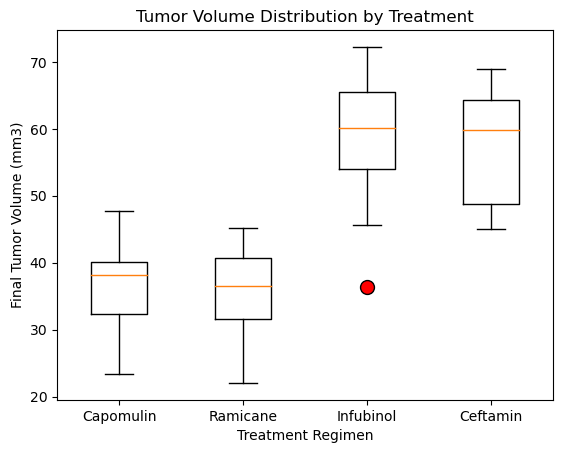

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments_list, flierprops=dict(markerfacecolor='red', markersize=10))
plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

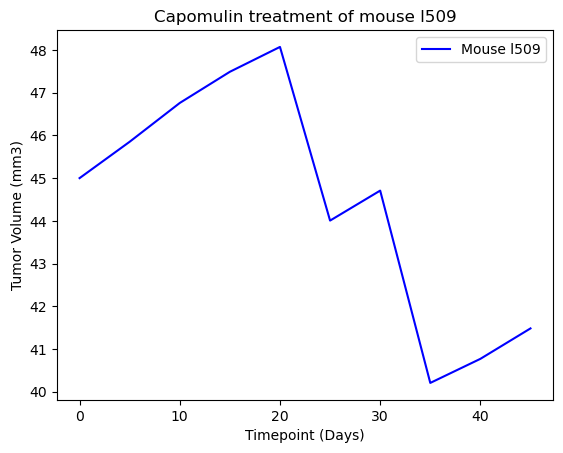

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Selected mouse ID
selected_mouse_id = 'l509'

# Filter data for the selected mouse and Capomulin treatment
selected_mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == selected_mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Create a line plot
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='blue', label=f'Mouse {selected_mouse_id}')

# Set plot labels and title
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

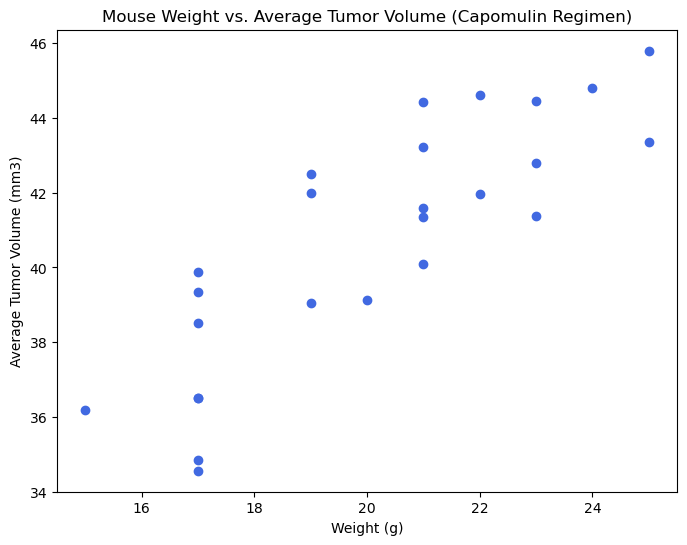

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group by Mouse ID to get average tumor volume and weight for Capomulin regimen

capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

average_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Scatter plot

# Set the plot size
plt.figure(figsize=(8, 6))

plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], marker='o', facecolors='royalblue')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
Slope: 0.95
Intercept: 21.55


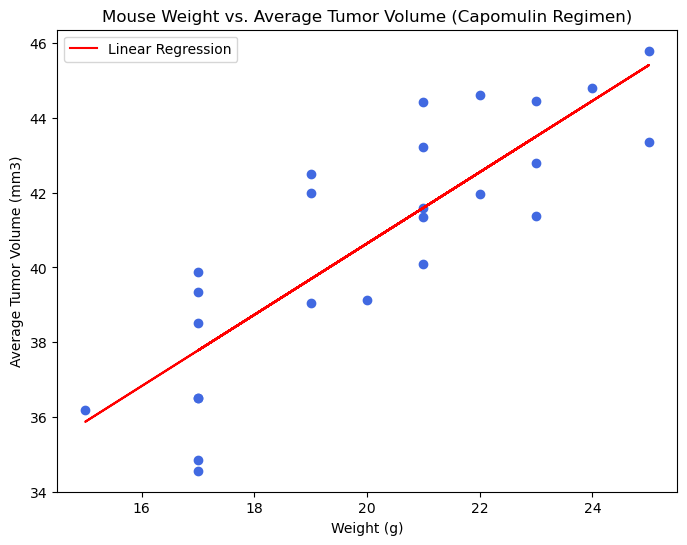

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Group by Mouse ID to get average tumor volume and weight for Capomulin regimen

# Calculate the average tumor volume and weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Set the plot size
plt.figure(figsize=(8, 6))

# Print the slope and intercept (coefficients of the linear regression model)
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

# Plot the scatter plot with linear regression line
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], marker='o', color='royalblue')
plt.plot(average_data['Weight (g)'], slope * average_data['Weight (g)'] + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
# Add legend
plt.legend(loc="best")

# Show the plot
plt.show()